INFO:root:Loading text and labels...
INFO:root:Text and label files loaded successfully.
INFO:root:Training Naive Bayes...
INFO:root:Evaluating Naive Bayes...


Metrics for class 'Negative':
  Precision: 0.6653
  Recall:    0.5895
  F1-Score:  0.6251
  Support:   799

Metrics for class 'Neutral':
  Precision: 0.5966
  Recall:    0.8027
  F1-Score:  0.6845
  Support:   1181

Metrics for class 'Positive':
  Precision: 0.7688
  Recall:    0.2579
  F1-Score:  0.3862
  Support:   477


Confusion Matrix:
[[471 323   5]
 [201 948  32]
 [ 36 318 123]]


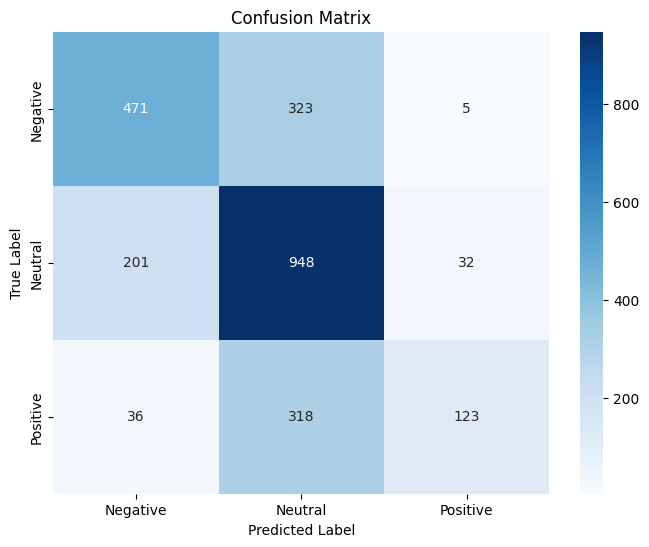


Confusion Matrix Explanation:
471 true negatives were correctly predicted as Negative.
323 negatives were misclassified as Neutral.
5 negatives were misclassified as Positive.
201 neutrals were misclassified as Negative.
948 true neutrals were correctly classified as Neutral.
32 neutrals were misclassified as Positive.
36 positives were misclassified as Negative.
318 positives were misclassified as Neutral.
123 true positives were correctly classified as Positive.
Overall Accuracy: 0.6276
ROC-AUC for class 'Negative': 0.8331
ROC-AUC for class 'Neutral': 0.7228
ROC-AUC for class 'Positive': 0.8377


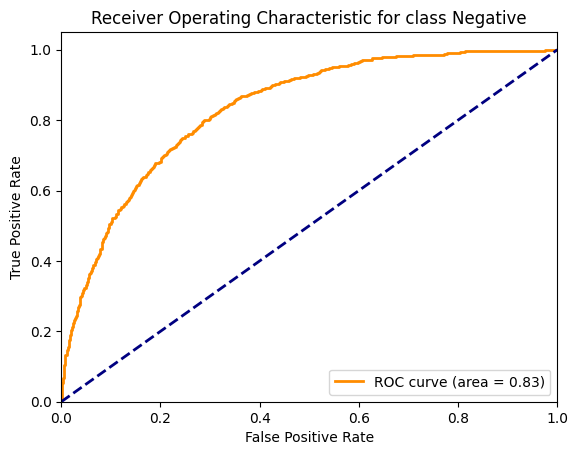

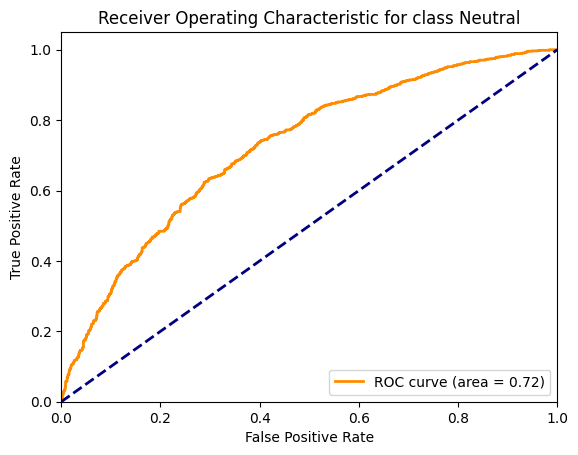

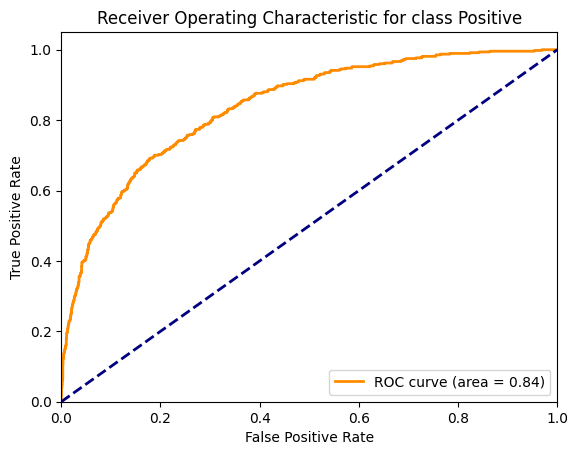

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import logging
import seaborn as sns

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()

# Load the data
logger.info("Loading text and labels...")
with open('../sentiment-data/test_text.txt', 'r', encoding='utf-8') as file:
    texts = file.readlines()

with open('../sentiment-data/test_labels.txt', 'r', encoding='utf-8') as file:
    labels = [int(label.strip()) for label in file.readlines()]

logger.info("Text and label files loaded successfully.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Initialize the classifier
clf = MultinomialNB()

# Train the classifier
logger.info("Training Naive Bayes...")
clf.fit(X_train, y_train)

# Predict and calculate scores
logger.info("Evaluating Naive Bayes...")
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1, 2])

# Print metrics
class_names = ['Negative', 'Neutral', 'Positive']
for i, class_name in enumerate(class_names):
    print(f"Metrics for class '{class_name}':")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall:    {recall[i]:.4f}")
    print(f"  F1-Score:  {f1[i]:.4f}")
    print(f"  Support:   {support[i]}")
    print()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show(block=False)

# Print a detailed explanation of the confusion matrix
print("\nConfusion Matrix Explanation:")
print(f"{conf_matrix[0, 0]} true negatives were correctly predicted as Negative.")
print(f"{conf_matrix[0, 1]} negatives were misclassified as Neutral.")
print(f"{conf_matrix[0, 2]} negatives were misclassified as Positive.")
print(f"{conf_matrix[1, 0]} neutrals were misclassified as Negative.")
print(f"{conf_matrix[1, 1]} true neutrals were correctly classified as Neutral.")
print(f"{conf_matrix[1, 2]} neutrals were misclassified as Positive.")
print(f"{conf_matrix[2, 0]} positives were misclassified as Negative.")
print(f"{conf_matrix[2, 1]} positives were misclassified as Neutral.")
print(f"{conf_matrix[2, 2]} true positives were correctly classified as Positive.")

# Calculate ROC-AUC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print ROC-AUC
print(f"Overall Accuracy: {accuracy:.4f}")
for i in range(3):
    print(f"ROC-AUC for class '{class_names[i]}': {roc_auc[i]:.4f}")

# Plot ROC curve
for i in range(3):
    plt.figure()
    plt.plot(fpr[i], tpr[i], color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for class {class_names[i]}')
    plt.legend(loc="lower right")
    plt.show(block=False)  # Non-blocking show
